<a href="https://colab.research.google.com/github/nrajmalwar/Python/blob/master/Session%205/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Dataset

Import important libraries and functions

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Input, Conv2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import load_model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
from keras.datasets import cifar10

# load 50,000 train images and 10,000 test images
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

# number of train images, channels, resolution
num_train, img_channels, img_rows, img_cols =  train_features.shape

#number of test images
num_test, _, _, _ =  test_features.shape

# number of classes
num_classes = len(np.unique(train_labels))

In [3]:
train_features.shape

(50000, 32, 32, 3)

Plot random images from each class

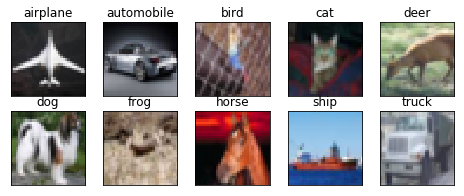

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Plot an image from each class
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Normalize the pixel values of images
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels (one-hot encoding)
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Cutout

In [0]:
# Function to implement Cutout
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
# ImageDataGenerator to implement cutout
datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(p =0.9, v_l=0, v_h=1)) 

# iterate over train images using train_generator
train_generator = datagen.flow(train_features, train_labels, batch_size = 128)

Plot images after cutout

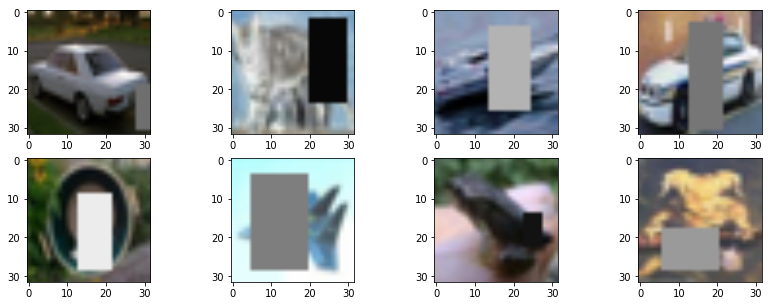

In [10]:
# Plot the images after cutout
x_batch, y_batch = next(train_generator)

fig = plt.figure(figsize=(14, 5))

for i in range(8):
    sub = fig.add_subplot(2, 4, i + 1)
    sub.imshow(x_batch[i,:,:], interpolation='bilinear')

# Build ResNet18 Model

In [11]:
# Glone the github file for model building
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-oh7j7u0u
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-oh7j7u0u
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-2_d1_ghf/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [12]:
from classification_models.resnet import ResNet18, preprocess_input
import keras

n_classes = 10

# build model with ResNet18 Architecture and pretrained 'imagenet' weights
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)

# Add extra layers in the end to and change the output number of classes to 10
x = Conv2D(512, (3,3), strides=(1, 1), padding='same')(base_model.output)
x = Conv2D(256, (1,1), strides=(1, 1))(x)
x = keras.layers.GlobalAveragePooling2D()(x)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])


W0709 10:45:45.059724 140453245405056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 10:45:45.109247 140453245405056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 10:45:45.110749 140453245405056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0709 10:45:45.112582 140453245405056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0709 10:45:45.116135 140453

44924928/44920640 [==============================] - 2s 0us/step


In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [14]:
# Learning rate scheduler
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.03 * 1/(1 + 0.319 * epoch), 10)

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

W0709 10:45:53.923201 140453245405056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [15]:
# Mount Google Drive to save the model
from google.colab import drive
drive.mount('/content/drive')

# Use ModelCheckpoint
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/EIP3_2_S5.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Cutout Model Training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=20)`
  """
W0705 08:49:27.804148 140476676519808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed i

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.03.
390/390 [==============================] - 53s 136ms/step - loss: 1.2313 - acc: 0.5693 - val_loss: 0.8650 - val_acc: 0.7016

Epoch 00001: val_acc improved from -inf to 0.70160, saving model to /content/drive/My Drive/Colab Notebooks/EIP3_2_S5.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0227445034.
390/390 [==============================] - 45s 114ms/step - loss: 0.8819 - acc: 0.6896 - val_loss: 0.7273 - val_acc: 0.7465

Epoch 00002: val_acc improved from 0.70160 to 0.74650, saving model to /content/drive/My Drive/Colab Notebooks/EIP3_2_S5.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0183150183.
390/390 [==============================] - 44s 112ms/step - loss: 0.7811 - acc: 0.7255 - val_loss: 0.6534 - val_acc: 0.7753

Epoch 00003: val_acc improved from 0.74650 to 0.77530, saving model to /content/drive/My Drive/Colab Notebooks/EIP3_2_S5.hdf5


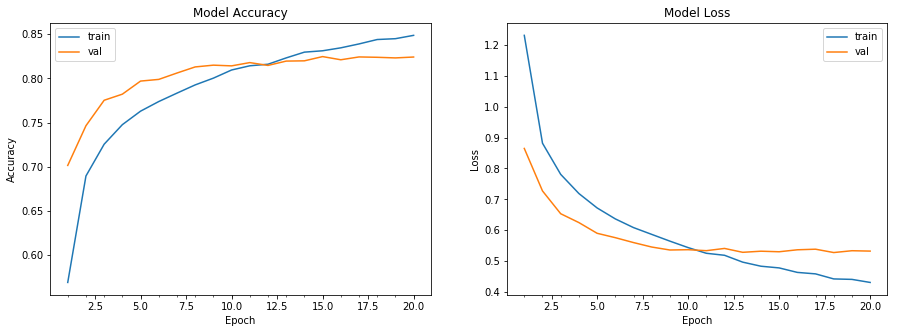

Accuracy on test data is: 82.42


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(train_generator,
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=10)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.03.
390/390 [==============================] - 47s 120ms/step - loss: 0.5165 - acc: 0.8163 - val_loss: 0.6538 - val_acc: 0.7878

Epoch 00001: val_acc did not improve from 0.82470
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0227445034.
390/390 [==============================] - 44s 112ms/step - loss: 0.4625 - acc: 0.8357 - val_loss: 0.5852 - val_acc: 0.8046

Epoch 00002: val_acc did not improve from 0.82470
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0183150183.
390/390 [==============================] - 44s 112ms/step - loss: 0.4131 - acc: 0.8550 - val_loss: 0.5813 - val_acc: 0.8169

Epoch 00003: val_acc did not improve from 0.82470
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0153295861.
390/390 [==============================] - 44s 112ms/step - loss: 0.3900 - acc: 0.8635 - val_loss: 0.5537 - val_acc: 0.8234

Epoch 00004: v

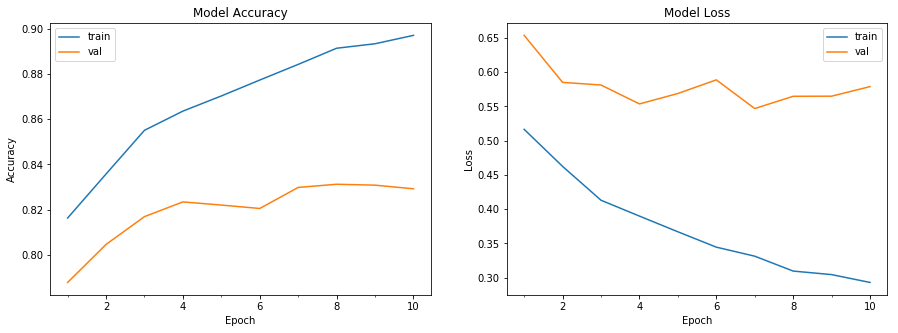

Accuracy on test data is: 82.92


In [0]:
# Unfreeze all the layers and train the model for additional 10 epochs
for layer in base_model.layers:
    layer.trainable = True
    
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(train_generator,
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Grad Cam after Cutout

In [16]:
# Load the model
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP3_2_S5.hdf5')

W0709 10:46:35.859691 140453245405056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
# Model Evaluation
score = model.evaluate(x=test_features, y= test_labels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 10s 1ms/step
Test loss: 0.5648256214141846
Test accuracy: 0.8312


In [0]:
# Collect the indices of misclassified images
mis_clas = []

preds = model.predict(test_features)
pred_idx = np.argmax(preds, axis=-1)
orig_idx = np.argmax(test_labels, axis=-1)

mis_clas = np.nonzero(pred_idx!=orig_idx)
mis_clas = mis_clas[0][:]
mis_clas = mis_clas.tolist()

In [0]:
import random

# Randomly select 50 misclassified images
img50 = random.sample(mis_clas, 50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


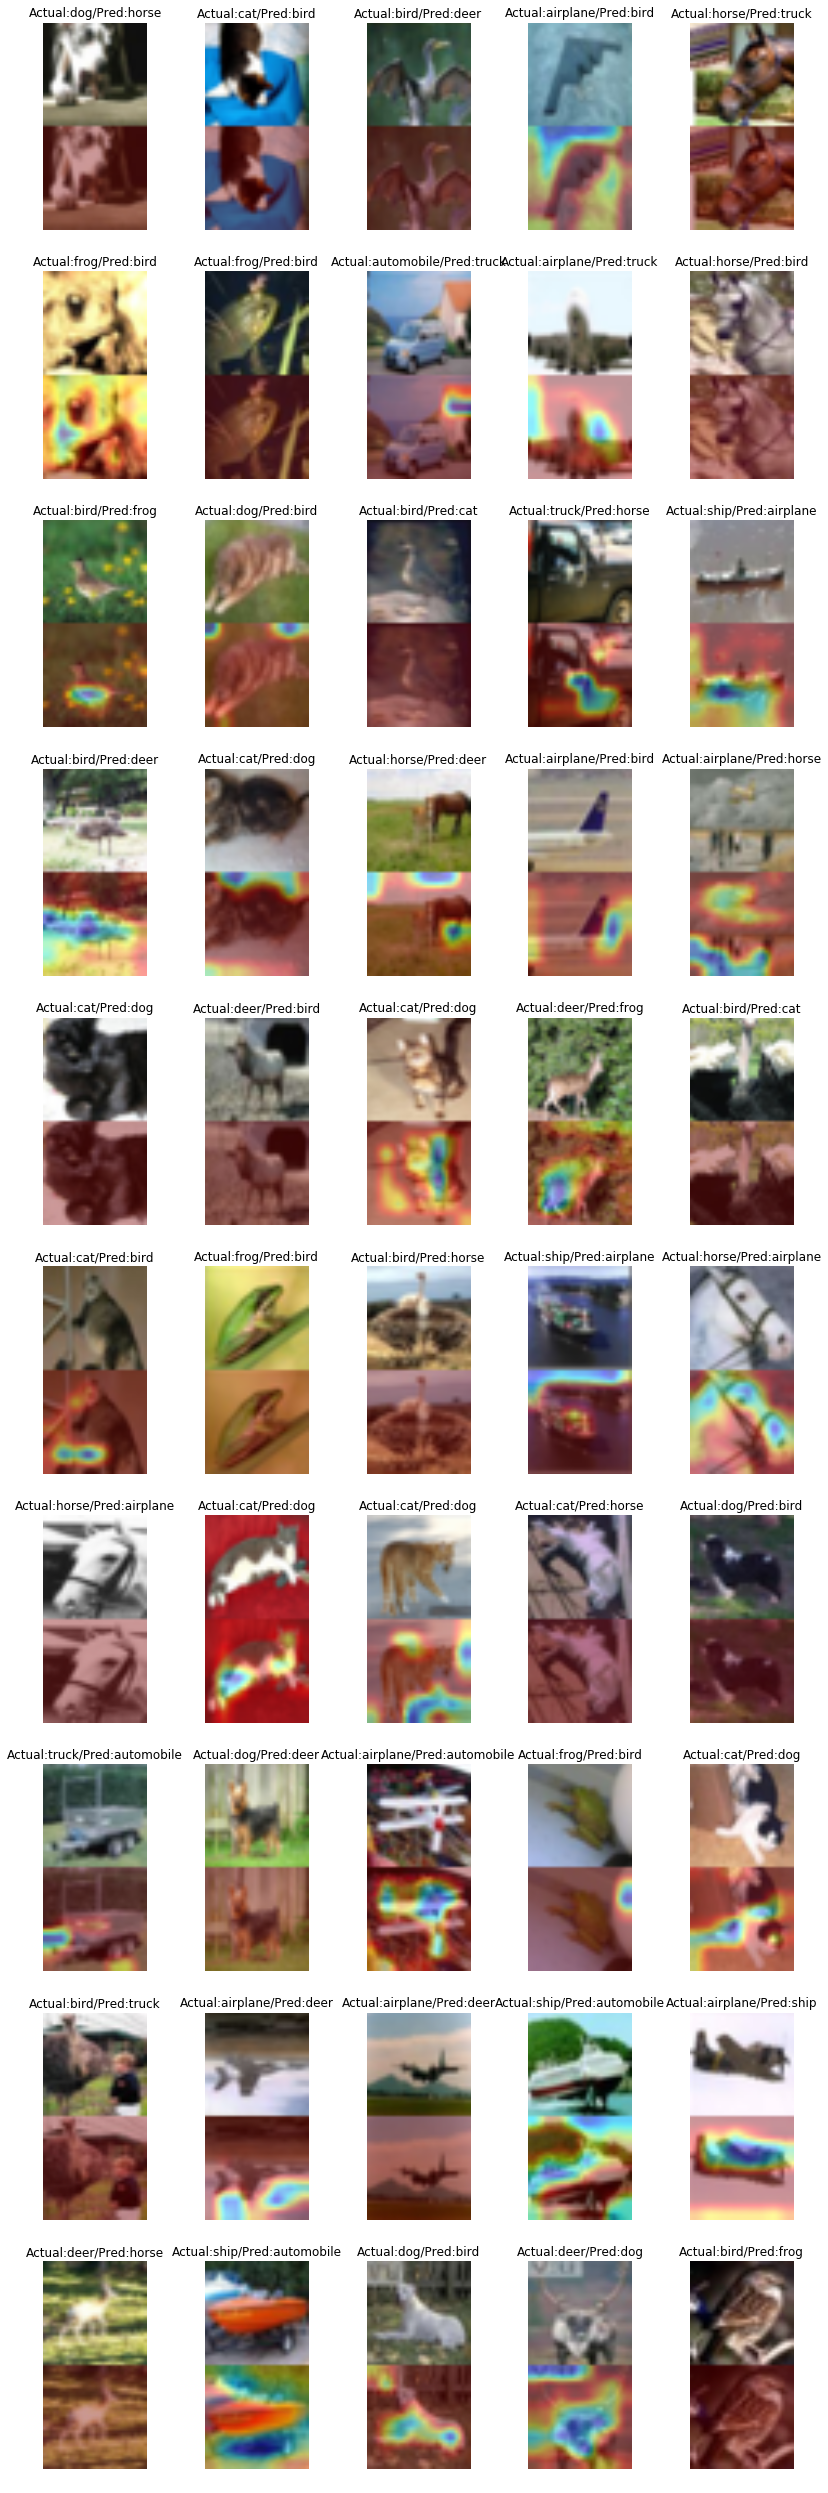

In [42]:
# Run Grad Cam for 50 images from test data

(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

k = 0
fig = plt.figure(figsize=(14, 45))

for j in img50:
  
  img = test_features[j]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("stage1_unit1_conv1")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(64):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  img = test_features[j]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  sub = fig.add_subplot(10, 5, k + 1)
  k += 1
  vis = np.concatenate((img, superimposed_img), axis=0)
  sub.imshow(vis, interpolation='bilinear')
  plt.axis('off')
  sub.set_title('Actual:' + class_names[orig_idx[j]] + '/Pred:' + class_names[pred_idx[j]])